#Preprocessing Images

In [1]:
%matplotlib inline

import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
from multiprocessing import Process
from PIL import ImageFile

In [2]:
Image.LOAD_TRUNCATED_IMAGES = True

In [3]:
def norm_image(img):
    """
    Normalize PIL image

    Normalizes luminance to (mean,std)=(0,1), and applies a [1%, 99%] contrast stretch
    """
    
    img_y, img_b, img_r = img.convert('YCbCr').split()

    img_y_np = np.asarray(img_y).astype(float)

    img_y_np /= 255
    img_y_np -= img_y_np.mean()
    img_y_np /= img_y_np.std()
    scale = np.max([np.abs(np.percentile(img_y_np, 1.0)),
                    np.abs(np.percentile(img_y_np, 99.0))])
    img_y_np = img_y_np / scale
    img_y_np = np.clip(img_y_np, -1.0, 1.0)
    img_y_np = (img_y_np + 1.0) / 2.0

    img_y_np = (img_y_np * 255 + 0.5).astype(np.uint8)

    img_y = Image.fromarray(img_y_np)

    img_ybr = Image.merge('YCbCr', (img_y, img_b, img_r))

    img_nrm = img_ybr.convert('RGB')

    return img_nrm

In [4]:
def resize_image(img, size):
    """
    Resize PIL image

    Resizes image to be square with sidelength size. Pads with black if needed.
    """
    # Resize
    n_x, n_y = img.size
    if n_y > n_x:
        n_y_new = size
        n_x_new = int(size * n_x / n_y + 0.5)
    else:
        n_x_new = size
        n_y_new = int(size * n_y / n_x + 0.5)

    img_res = img.resize((n_x_new, n_y_new), resample=PIL.Image.BICUBIC)

    # Pad the borders to create a square image
    img_pad = Image.new('RGB', (size, size), (0, 0, 0))
    ulc = ((size - n_x_new) // 2, (size - n_y_new) // 2)
    img_pad.paste(img_res, ulc)

    return img_pad

In [5]:
def prep_images(paths, out_dir):
    """
    Preprocess images

    Reads images in paths, and writes to out_dir

    """
    for count, path in enumerate(paths):
        if count % 100 == 0:
            print(path)
        breedcode = path[26:29]
        img = Image.open(path)
        try:
            img_nrm = norm_image(img)
            img_res = resize_image(img_nrm, SIZE)
            basename = os.path.basename(path)
            path_out = os.path.join(out_dir, breedcode + basename)
            img_res.save(path_out)
        except:
            print('there was a problem with image ' + path)

In [6]:
DATA_PATH = '../data/CU_Dogs/'
TRAIN_PATHS = ([DATA_PATH + 'dogImages/' + line.rstrip('\n')
              for line in open(DATA_PATH + '/training.txt')])
TEST_PATHS = ([DATA_PATH + 'dogImages/' + line.rstrip('\n')
              for line in open(DATA_PATH + '/testing.txt')])

#### Test the functionality

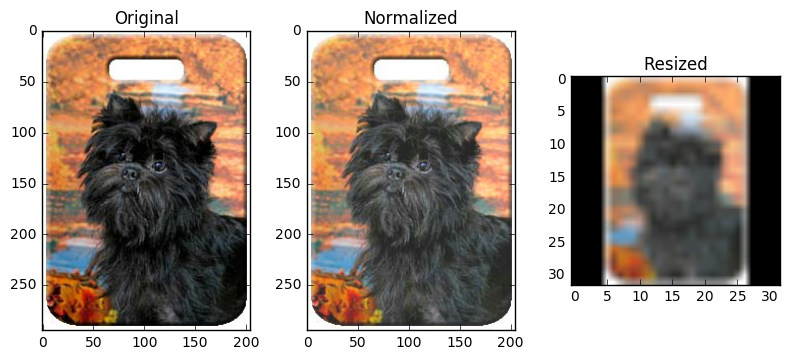

In [7]:
SIZE = 32

path = TRAIN_PATHS[24]
img = Image.open(path)

# Normalize it
img_nrm = norm_image(img)

# Resize it
img_res = resize_image(img_nrm, SIZE)

# Show it
plt.figure(figsize=(8,4))
plt.subplot(131)
plt.title('Original')
plt.imshow(img)

plt.subplot(132)
plt.title('Normalized')
plt.imshow(img_nrm)

plt.subplot(133)
plt.title('Resized')
plt.imshow(img_res)

plt.tight_layout()
plt.show()

In [8]:
train_out = os.path.join(DATA_PATH,'train-processed')
test_out = os.path.join(DATA_PATH,'test-processed')
try:
    os.makedirs(train_out)
    os.makedirs(test_out)
except OSError:
    print("Directory Already Exists")

In [9]:
procs = dict()
procs[1] = Process(target=prep_images, args=(TRAIN_PATHS, train_out, ))
procs[1].start()
procs[2] = Process(target=prep_images, args=(TEST_PATHS, test_out, ))
procs[2].start()
procs[1].join()
procs[2].join()

../data/CU_Dogs/dogImages/001.Affenpinscher/Affenpinscher_00003.jpg
../data/CU_Dogs/dogImages/001.Affenpinscher/Affenpinscher_00001.jpg
../data/CU_Dogs/dogImages/003.Airedale_terrier/Airedale_terrier_00185.jpg
../data/CU_Dogs/dogImages/004.Akita/Akita_00240.jpg
../data/CU_Dogs/dogImages/005.Alaskan_malamute/Alaskan_malamute_00351.jpg
../data/CU_Dogs/dogImages/007.American_foxhound/American_foxhound_00475.jpg
../data/CU_Dogs/dogImages/007.American_foxhound/American_foxhound_00521.jpg
../data/CU_Dogs/dogImages/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00691.jpg
../data/CU_Dogs/dogImages/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00711.jpg
../data/CU_Dogs/dogImages/012.Australian_shepherd/Australian_shepherd_00870.jpg
../data/CU_Dogs/dogImages/013.Australian_terrier/Australian_terrier_00934.jpg
../data/CU_Dogs/dogImages/015.Basset_hound/Basset_hound_01049.jpg
../data/CU_Dogs/dogImages/016.Beagle/Beagle_01178.jpg
../data/CU_Dogs/dogImages/017.Bearded_collie/Bearded_collie_01